In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cleaned_df = pd.read_csv("clean.csv")
cleaned_df.head()

Unnamed: 0 Unique ID  Household region  Age of sample adult  \
0           0   H056808                 3                   50   
1           1   H018779                 3                   53   
2           2   H049265                 3                   56   
3           3   H007699                 3                   57   
4           4   H066034                 3                   25   

   Sex of sample adult  Education of sample adult  Hispanic ethnicity of SA  \
0                    1                          1                         2   
1                    1                          7                         2   
2                    1                          8                         2   
3                    2                          5                         2   
4                    1                          4                         2   

   Single + Mult race gps w Hispanic origin  Hispanic origin detail  \
0                                         2                       3   
1                                         3                       3   
2                                         2                       3   
3                                         2                       3   
4                                         3                       3   

   Single and multiple race groups  ...  Medicaid HDHP.1  \
0                                1  ...              NaN   
1                                2  ...              NaN   
2                                1  ...              NaN   
3                                1  ...              NaN   
4                                2  ...              NaN   

   Medicaid reassignment flag  Paid for by Medicare - plan 1  \
0                         NaN                            2.0   
1                         NaN                            2.0   
2                         NaN                            2.0   
3                         NaN                            NaN   
4                         NaN                            2.0   

   Paid for by Medicare - plan 2  \
0                            NaN   
1                            NaN   
2                            NaN   
3                            NaN   
4                            NaN   

   Not eligible for Medicaid, CHIP, or other public coverage  \
0                                                NaN           
1                                                NaN           
2                                                NaN           
3                                                NaN           
4                                                NaN           

   SA family poverty ratio  \
0                     1.93   
1                     4.45   
2                     5.94   
3                     3.70   
4                     1.66   

   Ratio of family income to poverty threshold for SA’s family  \
0                                                  7             
1                                                 12             
2                                                 14             
3                                                 11             
4                                                  6             

   income from wages  income from SSI SSDI  income from retirement  
0                  1                   2.0                     2.0  
1                  1                   2.0                     2.0  
2                  1                   2.0                     2.0  
3                  1                   1.0                     1.0  
4                  8                   NaN                     NaN  

[5 rows x 40 columns]

In [3]:
# cleaned_df.columns

In [4]:
demographics = [
    'Unique ID', 
    'Household region', 
    'Age of sample adult', 
    'Sex of sample adult', 
    'Education of sample adult', 
    'Hispanic ethnicity of SA', 
    'Single + Mult race gps w Hispanic origin', 
    'Hispanic origin detail', 
    'Single and multiple race groups', 
    'Ever had Diabetes?',  
    'Weight without shoes (pounds)', 
    'Categorical Body Mass Index']
demographics_df = cleaned_df[demographics]
demographics_df.head()

Unique ID  Household region  Age of sample adult  Sex of sample adult  \
0   H056808                 3                   50                    1   
1   H018779                 3                   53                    1   
2   H049265                 3                   56                    1   
3   H007699                 3                   57                    2   
4   H066034                 3                   25                    1   

   Education of sample adult  Hispanic ethnicity of SA  \
0                          1                         2   
1                          7                         2   
2                          8                         2   
3                          5                         2   
4                          4                         2   

   Single + Mult race gps w Hispanic origin  Hispanic origin detail  \
0                                         2                       3   
1                                         3                       3   
2                                         2                       3   
3                                         2                       3   
4                                         3                       3   

   Single and multiple race groups  Ever had Diabetes?  \
0                                1                   2   
1                                2                   1   
2                                1                   2   
3                                1                   2   
4                                2                   2   

   Weight without shoes (pounds)  Categorical Body Mass Index  
0                            199                            3  
1                            205                            3  
2                            160                            3  
3                            190                            4  
4                            250                            4

In [5]:
# Rename Columns
dem_diabetes_df = demographics_df.rename(columns={ 
        'Unique ID': 'ID', 
        'Household region': 'Region', 
        'Age of sample adult': 'Age', 
        'Sex of sample adult': 'Gender', 
        'Education of sample adult': 'Education', 
        'Hispanic ethnicity of SA': 'Hispanic_Origin', 
        'Single + Mult race gps w Hispanic origin': 'Hispanic_Multiracial', 
        'Hispanic origin detail': 'Hispanic Type', 
        'Single and multiple race groups': 'Multiracial', 
        'Ever had Diabetes?': 'Diabetic?',  
        'Weight without shoes (pounds)': 'Weight(lbs)', 
        'Categorical Body Mass Index': 'BMI'})
dem_diabetes_df.head()

ID  Region  Age  Gender  Education  Hispanic_Origin  \
0  H056808       3   50       1          1                2   
1  H018779       3   53       1          7                2   
2  H049265       3   56       1          8                2   
3  H007699       3   57       2          5                2   
4  H066034       3   25       1          4                2   

   Hispanic_Multiracial  Hispanic Type  Multiracial  Diabetic?  Weight(lbs)  \
0                     2              3            1          2          199   
1                     3              3            2          1          205   
2                     2              3            1          2          160   
3                     2              3            1          2          190   
4                     3              3            2          2          250   

   BMI  
0    3  
1    3  
2    3  
3    4  
4    4

In [6]:
dem_diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29482 entries, 0 to 29481
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    29482 non-null  object
 1   Region                29482 non-null  int64 
 2   Age                   29482 non-null  int64 
 3   Gender                29482 non-null  int64 
 4   Education             29482 non-null  int64 
 5   Hispanic_Origin       29482 non-null  int64 
 6   Hispanic_Multiracial  29482 non-null  int64 
 7   Hispanic Type         29482 non-null  int64 
 8   Multiracial           29482 non-null  int64 
 9   Diabetic?             29482 non-null  int64 
 10  Weight(lbs)           29482 non-null  int64 
 11  BMI                   29482 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 2.7+ MB


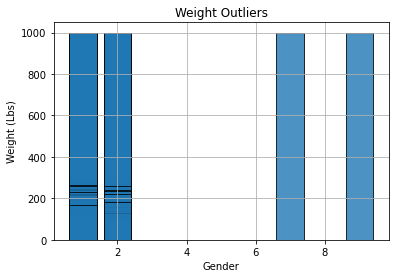

In [7]:
# Due to noticing +900lb weight figures, will create scatter plot to spot weight outliers

weight = dem_diabetes_df['Weight(lbs)']
gender = dem_diabetes_df['Gender']

plt.bar(gender,
            weight,
            edgecolor="black",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title("Weight Outliers")

plt.ylabel("Weight (Lbs)")

plt.xlabel("Gender")

plt.grid(True)

# Show plot.

plt.show()


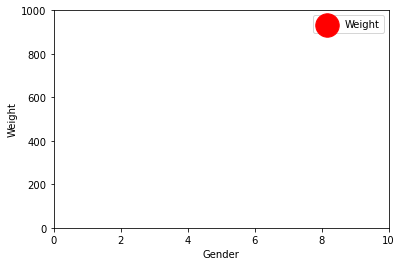

In [8]:
plt.scatter(weight, gender, c='r', label='Weight', s=weight)

plt.legend()

plt.xlabel('Gender')

plt.ylabel('Weight')

plt.xlim(0,10)

plt.ylim(0,1000)

plt.show()

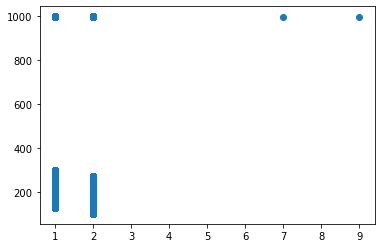

In [9]:
fig, ax = plt.subplots()

ax.scatter(gender, weight)

In [10]:
# diabetic = dem_diabetes_df['Diabetic?'].count
diabetic = dem_diabetes_df['Diabetic?'].value_counts()[1]
diabetic

3134

In [12]:
# fig, ax = plt.subplots()

# ax.scatter(diabetic, weight)

In [13]:
dem_diabetes_df['Diabetic?'].unique()

array([2, 1, 7, 9])

In [14]:
dem_diabetes_df['Weight(lbs)'].unique()

array([199, 205, 160, 190, 250, 200, 997, 206, 996, 127, 100, 208, 170,
       120, 165, 225, 150, 285, 178, 210, 249, 245, 191, 235, 136, 166,
       140, 174, 157, 215, 155, 240, 185, 119, 121, 280, 180, 115, 230,
       172, 181, 189, 175, 162, 176, 290, 133, 122, 299, 109, 118, 128,
       156, 220, 152, 130, 286, 197, 204, 125, 110, 234, 168, 146, 999,
       126, 135, 148, 298, 138, 218, 164, 265, 260, 134, 106, 179, 196,
       145, 273, 143, 163, 123, 158, 207, 108, 228, 105, 193, 195, 132,
       238, 233, 184, 198, 177, 103, 142, 212, 211, 171, 144, 114, 167,
       141, 151, 137, 214, 147, 139, 131, 203, 111, 270, 129, 241, 173,
       153, 188, 159, 209, 247, 187, 117, 283, 169, 267, 186, 113, 274,
       248, 223, 194, 252, 269, 217, 268, 182, 183, 231, 116, 272, 237,
       192, 224, 239, 243, 226, 154, 236, 101, 107, 253, 255, 124, 104,
       149, 161, 227, 213, 112, 295, 216, 221, 202, 275, 256, 201, 219,
       284, 222, 257, 229, 278, 232, 102, 281, 251, 297, 271, 24

In [15]:
dem_diabetes_df['Gender'].unique()

array([1, 2, 9, 7])

In [16]:
dem_diabetes_df['Age'].unique()

array([50, 53, 56, 57, 25, 55, 45, 41, 26, 71, 69, 44, 36, 59, 63, 48, 82,
       74, 67, 76, 49, 72, 62, 73, 47, 85, 43, 81, 28, 29, 54, 78, 65, 34,
       70, 46, 58, 66, 31, 75, 37, 38, 30, 33, 22, 52, 40, 80, 60, 35, 68,
       39, 42, 23, 20, 19, 21, 83, 32, 51, 24, 84, 64, 61, 27, 79, 77, 18,
       97, 99])

In [17]:
dem_diabetes_df['Diabetic?'].value_counts()
# 1 = yes
# 2 = no
# 7 = Refused
# 8 = Not Ascertained
# 9 = Don't know

2    26318
1     3134
7       18
9       12
Name: Diabetic?, dtype: int64

In [18]:
dem_diabetes_df['Gender'].value_counts()
# 1 = Male
# 2 = Female
# 7 = Refused
# 9 = Don't Know

2    16102
1    13378
9        1
7        1
Name: Gender, dtype: int64

In [19]:
dem_diabetes_df['Weight(lbs)'].value_counts()

996    1949
180    1275
150    1172
160    1129
200    1121
       ... 
297       3
292       2
288       2
281       1
293       1
Name: Weight(lbs), Length: 201, dtype: int64

In [20]:
dem_diabetes_df['Age'].value_counts()

85    1032
61     588
60     564
59     560
64     553
      ... 
83     222
19     219
84     194
97      76
99      10
Name: Age, Length: 70, dtype: int64

In [21]:
dem_diabetes_df['Region'].value_counts()
# 1 = Northeast
# 2 = Midwest
# 3 = South
# 4 = West

3    10731
4     7649
2     6327
1     4775
Name: Region, dtype: int64

In [22]:
dem_diabetes_df['Education'].value_counts()
# 1 = Grade 1-11
# 2 = 12th Grade, no diploma
# 3 = GED/Equivalent
# 4 = High School Graduate
# 5 = Some College, no degree
# 6 = Associates: occupational, technical, or vocational
# 7 = Associates: academic program
# 8 = Bachelor's degree (Example: BA, AB, BS, BBA)
# 9 = Master's degree (Example: MA, MS, MEng, MEd, MBA)
# 10 = Professional School or Doctoral degree (Example: MD, DDS, DVM, JD,
# PhD, EdD)
# 97 = Refused
# 99 = Don't Know

8     6968
4     6606
5     4453
9     3284
7     2566
1     2069
10    1149
6     1126
3      645
2      464
99     101
97      51
Name: Education, dtype: int64

In [23]:
dem_diabetes_df['Education'].value_counts().sum()

29482

In [24]:
dem_diabetes_df['Hispanic_Origin'].value_counts()
# 1 = yes
# 2 = no

2    25401
1     4081
Name: Hispanic_Origin, dtype: int64

In [25]:
dem_diabetes_df['Hispanic_Multiracial'].value_counts()
# 1 = Hispanic
# 2 = Non-Hispanic White Only
# 3 = Non-Hispanic Black/African American only
# 4 = Non-Hispanic Asian only
# 5 = Non-Hispanic AIAN only
# 6 = Non-Hispanic AIAN and any other group
# 7 = Other single and multiple races

2    19658
1     4081
3     3160
4     1810
7      367
6      224
5      182
Name: Hispanic_Multiracial, dtype: int64

In [26]:
dem_diabetes_df['Hispanic Type'].value_counts()
# 1 = Hispanic (Mexican/Mexican American)
# 2 = Hispanic (all other groups)
# 3 = Not Hispanic
# 8 = Not Ascertained
# 9 = Don't Know

3    25405
1     2323
2     1693
8       40
9       21
Name: Hispanic Type, dtype: int64

In [27]:
dem_diabetes_df['Multiracial'].value_counts()
# 1 = White Only
# 2 = African American Only
# 3 = Asian Only
# 4 = American Indian or Alaskan Native (AIAN) only
# 5 = AIAN and any other group
# 6 = Other single and multiple races
# 7 = Refused
# 8 = Not Ascertained
# 9 = Don't Know

1    21948
2     3282
3     1831
8     1444
6      435
5      266
4      235
9       24
7       17
Name: Multiracial, dtype: int64

In [28]:
dem_diabetes_df['BMI'].value_counts()
# 1 = Underweight
# 2 = Healthy Weight
# 3 = Overweight
# 4 = Obese
# 9 = Unknown

3    9917
4    9225
2    9144
9     733
1     463
Name: BMI, dtype: int64

In [29]:
education = dem_diabetes_df['Education']
diabetes = dem_diabetes_df['Diabetic?']

In [30]:
bmi = dem_diabetes_df['BMI']

bmi = bmi.replace([1, 2, 3, 4, 9], ['Underweight', 'Healthy Weight', 'Overweight', 'Obese', 'Unknown'], inplace=True)
# dem_diabetes_df.head(50)

In [31]:
dem_diabetes_df.head()

ID  Region  Age  Gender  Education  Hispanic_Origin  \
0  H056808       3   50       1          1                2   
1  H018779       3   53       1          7                2   
2  H049265       3   56       1          8                2   
3  H007699       3   57       2          5                2   
4  H066034       3   25       1          4                2   

   Hispanic_Multiracial  Hispanic Type  Multiracial  Diabetic?  Weight(lbs)  \
0                     2              3            1          2          199   
1                     3              3            2          1          205   
2                     2              3            1          2          160   
3                     2              3            1          2          190   
4                     3              3            2          2          250   

          BMI  
0  Overweight  
1  Overweight  
2  Overweight  
3       Obese  
4       Obese

In [32]:
education = education.replace(
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 97, 99], 
    ['1-11', 
     '12th, no diploma', 
     'GED/Equiv', 
     'HS Grad', 
     'Some College, no degree',
     'Associates',
     'Associates: academic program',
     'Bachelor',
     'Masters',
     'Terminal Degree',
     'Refused',
     'Unknown'], 
    inplace=True)
dem_diabetes_df.head()

ID  Region  Age  Gender                     Education  \
0  H056808       3   50       1                          1-11   
1  H018779       3   53       1  Associates: academic program   
2  H049265       3   56       1                      Bachelor   
3  H007699       3   57       2       Some College, no degree   
4  H066034       3   25       1                       HS Grad   

   Hispanic_Origin  Hispanic_Multiracial  Hispanic Type  Multiracial  \
0                2                     2              3            1   
1                2                     3              3            2   
2                2                     2              3            1   
3                2                     2              3            1   
4                2                     3              3            2   

   Diabetic?  Weight(lbs)         BMI  
0          2          199  Overweight  
1          1          205  Overweight  
2          2          160  Overweight  
3          2          190       Obese  
4          2          250       Obese

In [36]:
diabetes = dem_diabetes_df['Diabetic?']
region = dem_diabetes_df['Region']
hisp_origin = dem_diabetes_df['Hispanic_Origin']
hisp_multiracial = dem_diabetes_df['Hispanic_Multiracial']
hisp_type = dem_diabetes_df['Hispanic Type']
multiracial = dem_diabetes_df['Multiracial']
gender = dem_diabetes_df['Gender']

In [37]:
gender = gender.replace(
    [1, 2, 7, 9], 
    ['Male', 'Female', 'Refused', 'Unknown'], inplace=True)

dem_diabetes_df.head(10)

ID  Region  Age  Gender                     Education  \
0  H056808       3   50    Male                          1-11   
1  H018779       3   53    Male  Associates: academic program   
2  H049265       3   56    Male                      Bachelor   
3  H007699       3   57  Female       Some College, no degree   
4  H066034       3   25    Male                       HS Grad   
5  H037403       3   55    Male       Some College, no degree   
6  H023974       3   45    Male                       Masters   
7  H025636       3   41    Male       Some College, no degree   
8  H018455       3   26  Female                       HS Grad   
9  H030679       3   71  Female                       Masters   

   Hispanic_Origin  Hispanic_Multiracial  Hispanic Type  Multiracial  \
0                2                     2              3            1   
1                2                     3              3            2   
2                2                     2              3            1   
3                2                     2              3            1   
4                2                     3              3            2   
5                2                     3              3            2   
6                2                     2              3            1   
7                2                     3              3            2   
8                2                     3              3            2   
9                2                     2              3            1   

   Diabetic?  Weight(lbs)             BMI  
0          2          199      Overweight  
1          1          205      Overweight  
2          2          160      Overweight  
3          2          190           Obese  
4          2          250           Obese  
5          2          200      Overweight  
6          2          997         Unknown  
7          2          206      Overweight  
8          2          996           Obese  
9          2          127  Healthy Weight

In [39]:

hisp_type = hisp_type.replace(
    [1, 2, 3, 8, 9], 
    ['Hisp (Mex/Mex-Amer)', 'Hispanic(other)', 'Not Hispanic', 'Not Ascertained', 'Unknown'], inplace=True)
dem_diabetes_df.head(10)

ID  Region  Age  Gender                     Education  \
0  H056808       3   50    Male                          1-11   
1  H018779       3   53    Male  Associates: academic program   
2  H049265       3   56    Male                      Bachelor   
3  H007699       3   57  Female       Some College, no degree   
4  H066034       3   25    Male                       HS Grad   
5  H037403       3   55    Male       Some College, no degree   
6  H023974       3   45    Male                       Masters   
7  H025636       3   41    Male       Some College, no degree   
8  H018455       3   26  Female                       HS Grad   
9  H030679       3   71  Female                       Masters   

   Hispanic_Origin  Hispanic_Multiracial Hispanic Type  Multiracial  \
0                2                     2  Not Hispanic            1   
1                2                     3  Not Hispanic            2   
2                2                     2  Not Hispanic            1   
3                2                     2  Not Hispanic            1   
4                2                     3  Not Hispanic            2   
5                2                     3  Not Hispanic            2   
6                2                     2  Not Hispanic            1   
7                2                     3  Not Hispanic            2   
8                2                     3  Not Hispanic            2   
9                2                     2  Not Hispanic            1   

   Diabetic?  Weight(lbs)             BMI  
0          2          199      Overweight  
1          1          205      Overweight  
2          2          160      Overweight  
3          2          190           Obese  
4          2          250           Obese  
5          2          200      Overweight  
6          2          997         Unknown  
7          2          206      Overweight  
8          2          996           Obese  
9          2          127  Healthy Weight

In [40]:

diabetes = diabetes.replace(
    [1, 2, 7, 8, 9], 
    ['Yes', 'No', 'Refused', 'Not Ascertained', 'Unknown'], inplace=True)

dem_diabetes_df.head(10)

ID  Region  Age  Gender                     Education  \
0  H056808       3   50    Male                          1-11   
1  H018779       3   53    Male  Associates: academic program   
2  H049265       3   56    Male                      Bachelor   
3  H007699       3   57  Female       Some College, no degree   
4  H066034       3   25    Male                       HS Grad   
5  H037403       3   55    Male       Some College, no degree   
6  H023974       3   45    Male                       Masters   
7  H025636       3   41    Male       Some College, no degree   
8  H018455       3   26  Female                       HS Grad   
9  H030679       3   71  Female                       Masters   

   Hispanic_Origin  Hispanic_Multiracial Hispanic Type  Multiracial Diabetic?  \
0                2                     2  Not Hispanic            1        No   
1                2                     3  Not Hispanic            2       Yes   
2                2                     2  Not Hispanic            1        No   
3                2                     2  Not Hispanic            1        No   
4                2                     3  Not Hispanic            2        No   
5                2                     3  Not Hispanic            2        No   
6                2                     2  Not Hispanic            1        No   
7                2                     3  Not Hispanic            2        No   
8                2                     3  Not Hispanic            2        No   
9                2                     2  Not Hispanic            1        No   

   Weight(lbs)             BMI  
0          199      Overweight  
1          205      Overweight  
2          160      Overweight  
3          190           Obese  
4          250           Obese  
5          200      Overweight  
6          997         Unknown  
7          206      Overweight  
8          996           Obese  
9          127  Healthy Weight

In [41]:
multiracial = multiracial.replace(
    [1, 2, 3, 4, 5, 6, 7, 8, 9],                                        
    ['White only',                                     
     'African American only',                                    
     'Asian only', 
     'American Indian or Alaskan Native (AIAN) only',                                 
     'AIAN and any other group',
     'Other single and Multiracial',
     'Refused',
     'Not Ascertained',
     'Unknown'], inplace=True)

dem_diabetes_df.head(10)

ID  Region  Age  Gender                     Education  \
0  H056808       3   50    Male                          1-11   
1  H018779       3   53    Male  Associates: academic program   
2  H049265       3   56    Male                      Bachelor   
3  H007699       3   57  Female       Some College, no degree   
4  H066034       3   25    Male                       HS Grad   
5  H037403       3   55    Male       Some College, no degree   
6  H023974       3   45    Male                       Masters   
7  H025636       3   41    Male       Some College, no degree   
8  H018455       3   26  Female                       HS Grad   
9  H030679       3   71  Female                       Masters   

   Hispanic_Origin  Hispanic_Multiracial Hispanic Type            Multiracial  \
0                2                     2  Not Hispanic             White only   
1                2                     3  Not Hispanic  African American only   
2                2                     2  Not Hispanic             White only   
3                2                     2  Not Hispanic             White only   
4                2                     3  Not Hispanic  African American only   
5                2                     3  Not Hispanic  African American only   
6                2                     2  Not Hispanic             White only   
7                2                     3  Not Hispanic  African American only   
8                2                     3  Not Hispanic  African American only   
9                2                     2  Not Hispanic             White only   

  Diabetic?  Weight(lbs)             BMI  
0        No          199      Overweight  
1       Yes          205      Overweight  
2        No          160      Overweight  
3        No          190           Obese  
4        No          250           Obese  
5        No          200      Overweight  
6        No          997         Unknown  
7        No          206      Overweight  
8        No          996           Obese  
9        No          127  Healthy Weight

In [42]:

hisp_multiracial = hisp_multiracial.replace(
    [1, 2, 3, 4, 5, 6, 7],                                
    ['Hisp',             
     'Non-Hispanic White only',   
     'Non-Hispanic African American only',              
     'Non-Hispanic Asian only',               
     'Non-Hispanic AIAN only',     
     'Non-Hispanic AIAN and other group',                                        
     'Other single and Multiracial'], inplace=True)

dem_diabetes_df.head(10)

ID  Region  Age  Gender                     Education  \
0  H056808       3   50    Male                          1-11   
1  H018779       3   53    Male  Associates: academic program   
2  H049265       3   56    Male                      Bachelor   
3  H007699       3   57  Female       Some College, no degree   
4  H066034       3   25    Male                       HS Grad   
5  H037403       3   55    Male       Some College, no degree   
6  H023974       3   45    Male                       Masters   
7  H025636       3   41    Male       Some College, no degree   
8  H018455       3   26  Female                       HS Grad   
9  H030679       3   71  Female                       Masters   

   Hispanic_Origin                Hispanic_Multiracial Hispanic Type  \
0                2             Non-Hispanic White only  Not Hispanic   
1                2  Non-Hispanic African American only  Not Hispanic   
2                2             Non-Hispanic White only  Not Hispanic   
3                2             Non-Hispanic White only  Not Hispanic   
4                2  Non-Hispanic African American only  Not Hispanic   
5                2  Non-Hispanic African American only  Not Hispanic   
6                2             Non-Hispanic White only  Not Hispanic   
7                2  Non-Hispanic African American only  Not Hispanic   
8                2  Non-Hispanic African American only  Not Hispanic   
9                2             Non-Hispanic White only  Not Hispanic   

             Multiracial Diabetic?  Weight(lbs)             BMI  
0             White only        No          199      Overweight  
1  African American only       Yes          205      Overweight  
2             White only        No          160      Overweight  
3             White only        No          190           Obese  
4  African American only        No          250           Obese  
5  African American only        No          200      Overweight  
6             White only        No          997         Unknown  
7  African American only        No          206      Overweight  
8  African American only        No          996           Obese  
9             White only        No          127  Healthy Weight

In [43]:

hisp_origin = hisp_origin.replace(
    [1, 2], 
    ['Yes', 'No'], inplace=True)

dem_diabetes_df.head(10)

ID  Region  Age  Gender                     Education Hispanic_Origin  \
0  H056808       3   50    Male                          1-11              No   
1  H018779       3   53    Male  Associates: academic program              No   
2  H049265       3   56    Male                      Bachelor              No   
3  H007699       3   57  Female       Some College, no degree              No   
4  H066034       3   25    Male                       HS Grad              No   
5  H037403       3   55    Male       Some College, no degree              No   
6  H023974       3   45    Male                       Masters              No   
7  H025636       3   41    Male       Some College, no degree              No   
8  H018455       3   26  Female                       HS Grad              No   
9  H030679       3   71  Female                       Masters              No   

                 Hispanic_Multiracial Hispanic Type            Multiracial  \
0             Non-Hispanic White only  Not Hispanic             White only   
1  Non-Hispanic African American only  Not Hispanic  African American only   
2             Non-Hispanic White only  Not Hispanic             White only   
3             Non-Hispanic White only  Not Hispanic             White only   
4  Non-Hispanic African American only  Not Hispanic  African American only   
5  Non-Hispanic African American only  Not Hispanic  African American only   
6             Non-Hispanic White only  Not Hispanic             White only   
7  Non-Hispanic African American only  Not Hispanic  African American only   
8  Non-Hispanic African American only  Not Hispanic  African American only   
9             Non-Hispanic White only  Not Hispanic             White only   

  Diabetic?  Weight(lbs)             BMI  
0        No          199      Overweight  
1       Yes          205      Overweight  
2        No          160      Overweight  
3        No          190           Obese  
4        No          250           Obese  
5        No          200      Overweight  
6        No          997         Unknown  
7        No          206      Overweight  
8        No          996           Obese  
9        No          127  Healthy Weight

In [44]:

region = region.replace(
    [1, 2, 3, 4], 
    ['Northeast', 'Midwest', 'South', 'West'], inplace=True)

dem_diabetes_df.head(10)

ID Region  Age  Gender                     Education Hispanic_Origin  \
0  H056808  South   50    Male                          1-11              No   
1  H018779  South   53    Male  Associates: academic program              No   
2  H049265  South   56    Male                      Bachelor              No   
3  H007699  South   57  Female       Some College, no degree              No   
4  H066034  South   25    Male                       HS Grad              No   
5  H037403  South   55    Male       Some College, no degree              No   
6  H023974  South   45    Male                       Masters              No   
7  H025636  South   41    Male       Some College, no degree              No   
8  H018455  South   26  Female                       HS Grad              No   
9  H030679  South   71  Female                       Masters              No   

                 Hispanic_Multiracial Hispanic Type            Multiracial  \
0             Non-Hispanic White only  Not Hispanic             White only   
1  Non-Hispanic African American only  Not Hispanic  African American only   
2             Non-Hispanic White only  Not Hispanic             White only   
3             Non-Hispanic White only  Not Hispanic             White only   
4  Non-Hispanic African American only  Not Hispanic  African American only   
5  Non-Hispanic African American only  Not Hispanic  African American only   
6             Non-Hispanic White only  Not Hispanic             White only   
7  Non-Hispanic African American only  Not Hispanic  African American only   
8  Non-Hispanic African American only  Not Hispanic  African American only   
9             Non-Hispanic White only  Not Hispanic             White only   

  Diabetic?  Weight(lbs)             BMI  
0        No          199      Overweight  
1       Yes          205      Overweight  
2        No          160      Overweight  
3        No          190           Obese  
4        No          250           Obese  
5        No          200      Overweight  
6        No          997         Unknown  
7        No          206      Overweight  
8        No          996           Obese  
9        No          127  Healthy Weight

In [45]:
for i in weight:
    if i > 900:
        weight.replace([i], ['Unknown'], inplace=True)

dem_diabetes_df.head(10)

ID Region  Age  Gender                     Education Hispanic_Origin  \
0  H056808  South   50    Male                          1-11              No   
1  H018779  South   53    Male  Associates: academic program              No   
2  H049265  South   56    Male                      Bachelor              No   
3  H007699  South   57  Female       Some College, no degree              No   
4  H066034  South   25    Male                       HS Grad              No   
5  H037403  South   55    Male       Some College, no degree              No   
6  H023974  South   45    Male                       Masters              No   
7  H025636  South   41    Male       Some College, no degree              No   
8  H018455  South   26  Female                       HS Grad              No   
9  H030679  South   71  Female                       Masters              No   

                 Hispanic_Multiracial Hispanic Type            Multiracial  \
0             Non-Hispanic White only  Not Hispanic             White only   
1  Non-Hispanic African American only  Not Hispanic  African American only   
2             Non-Hispanic White only  Not Hispanic             White only   
3             Non-Hispanic White only  Not Hispanic             White only   
4  Non-Hispanic African American only  Not Hispanic  African American only   
5  Non-Hispanic African American only  Not Hispanic  African American only   
6             Non-Hispanic White only  Not Hispanic             White only   
7  Non-Hispanic African American only  Not Hispanic  African American only   
8  Non-Hispanic African American only  Not Hispanic  African American only   
9             Non-Hispanic White only  Not Hispanic             White only   

  Diabetic? Weight(lbs)             BMI  
0        No         199      Overweight  
1       Yes         205      Overweight  
2        No         160      Overweight  
3        No         190           Obese  
4        No         250           Obese  
5        No         200      Overweight  
6        No     Unknown         Unknown  
7        No         206      Overweight  
8        No     Unknown           Obese  
9        No         127  Healthy Weight